In [1]:
import pandas as pd

df=pd.read_csv('d:/data/steam/steam_final.csv')
df.head()

,days_after_releasing,english,required_age,achievements,average_playtime,median_playtime,owners,price,positive_ratings,negative_ratings,...,Action,Casual,Adventure,Strategy,Simulation,Early Access,RPG,Free to Play,Puzzle,p-n ratio
0,6769,1,0,0,17612,317,15000000,7.19,124534,3339,...,1,0,0,0,0,0,0,0,0,37.296795
1,7349,1,0,0,277,62,7500000,3.99,3318,633,...,1,0,0,0,0,0,0,0,0,5.241706
2,5858,1,0,0,187,34,7500000,3.99,3416,398,...,0,0,0,0,0,0,0,0,0,8.582915
3,6557,1,0,0,258,184,7500000,3.99,1273,267,...,1,0,0,0,0,0,0,0,0,4.767790
4,7135,1,0,0,624,415,7500000,3.99,5250,288,...,1,0,0,0,0,0,0,0,0,18.229167


In [2]:
import numpy as np
from matplotlib import font_manager,rc

font_name=font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
rc('font', family=font_name)

df['p-n ratio_categorize']=np.digitize(df['p-n ratio'], [0,4,8])
df.head()

,days_after_releasing,english,required_age,achievements,average_playtime,median_playtime,owners,price,positive_ratings,negative_ratings,...,Casual,Adventure,Strategy,Simulation,Early Access,RPG,Free to Play,Puzzle,p-n ratio,p-n ratio_categorize
0,6769,1,0,0,17612,317,15000000,7.19,124534,3339,...,0,0,0,0,0,0,0,0,37.296795,3
1,7349,1,0,0,277,62,7500000,3.99,3318,633,...,0,0,0,0,0,0,0,0,5.241706,2
2,5858,1,0,0,187,34,7500000,3.99,3416,398,...,0,0,0,0,0,0,0,0,8.582915,3
3,6557,1,0,0,258,184,7500000,3.99,1273,267,...,0,0,0,0,0,0,0,0,4.767790,2
4,7135,1,0,0,624,415,7500000,3.99,5250,288,...,0,0,0,0,0,0,0,0,18.229167,3


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (1: 나쁨, 2: 보통, 3: 좋음)')

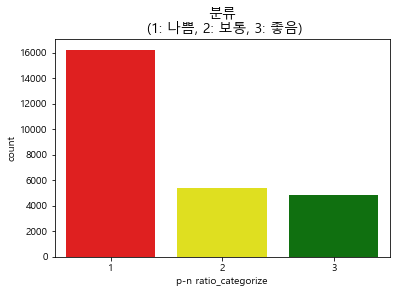

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

colors=['red','yellow','green']
sns.countplot('p-n ratio_categorize', data=df, palette=colors)
plt.title("분류\n (1: 나쁨, 2: 보통, 3: 좋음)", fontsize=14)

In [4]:
from imblearn.under_sampling import RandomUnderSampler

X=df[df.columns[:-2]]
y=df['p-n ratio_categorize']

X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp=pd.DataFrame(data=X_sample, columns=df.columns[:-2])
y_samp=pd.DataFrame(data=y_sample, columns=['p-n ratio_categorize'])
df2=pd.concat([X_samp,y_samp], axis=1)

In [5]:
df2['p-n ratio_categorize'].value_counts()

1    4876
2    4876
3    4876
Name: p-n ratio_categorize, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (1: 나쁨, 2: 보통, 3: 좋음)')

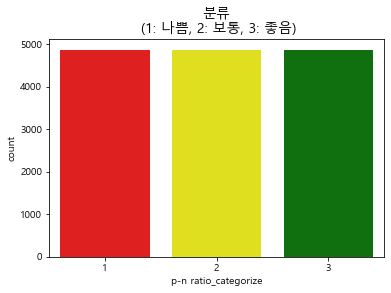

In [6]:
sns.countplot('p-n ratio_categorize', data=df2, palette=colors)
plt.title("분류\n (1: 나쁨, 2: 보통, 3: 좋음)", fontsize=14)

In [7]:
X=df2[df2.columns[:-1]]
y=df2['p-n ratio_categorize']

In [8]:
df2.isnull().values.any()

False

In [9]:
df.isnull().values.any()

False

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)
model=LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

In [23]:
y_train.value_counts()

1    3938
3    3891
2    3873
Name: p-n ratio_categorize, dtype: int64

In [25]:
y_test.value_counts()

2    1003
3     985
1     938
Name: p-n ratio_categorize, dtype: int64

In [11]:
print('학습용 :',model.score(X_train, y_train))
print('검증용 :',model.score(X_test, y_test))

학습용 : 0.8936079302683302
검증용 : 0.8796992481203008


In [12]:
from sklearn.metrics import confusion_matrix

pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm

array([[843,  54,  41],
       [ 24, 829, 150],
       [  0,  83, 902]], dtype=int64)

<AxesSubplot:title={'center':'Confusion Matrix'}>

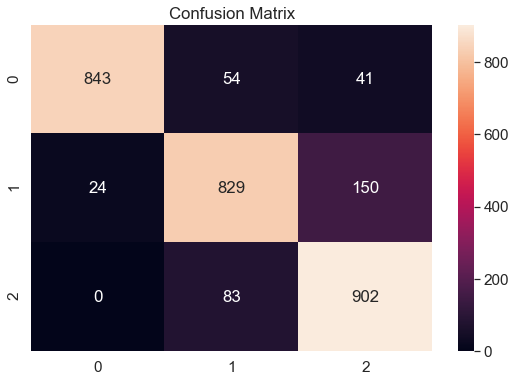

In [13]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt='d')

In [14]:
coef=pd.DataFrame(model.coef_[2],X.columns,columns=['coef']).sort_values(by='coef', ascending=False)
coef

,coef
positive_ratings,0.413697
Steam Trading Cards_cate,0.006024
median_playtime,0.002297
Steam Cloud_cate,0.001491
Puzzle,0.001261
Free to Play,0.000481
achievements,0.000082
days_after_releasing,0.000063
owners,-0.000009
Steam Leaderboards_cate,-0.000474


In [15]:
model.coef_

array([[-2.30879225e-04,  1.50006942e-02,  2.31655112e-03,
        -2.22662566e-04,  2.64595025e-03, -4.06791211e-03,
         6.28178519e-06,  4.69964799e-02, -4.51300462e-01,
         2.29150441e+00, -3.38319592e-03, -3.40220503e-03,
         1.50170847e-02,  1.36088663e-02, -6.28702098e-03,
        -4.92278974e-03, -4.49810297e-03, -3.47832394e-03,
         2.55584352e-03,  8.49125467e-04, -2.32999488e-03,
         5.57204811e-04,  6.45437322e-04,  7.94520734e-03,
         7.41364693e-03,  1.00044269e-02,  5.79965747e-03,
         2.37487926e-03,  3.71085938e-04,  4.45681389e-03,
         1.28529582e-03, -4.14274961e-04, -1.02375032e-03],
       [ 1.68082086e-04,  2.05333976e-02,  1.72046121e-03,
         1.40636955e-04, -1.07899843e-03,  1.77043406e-03,
         2.39513754e-06,  1.05137942e-02,  3.76031114e-02,
         3.44301091e-01,  4.92456060e-03,  6.49767306e-03,
         2.08588345e-02,  2.02933122e-02,  1.20894797e-02,
        -1.10163247e-03,  3.00690987e-03,  6.87732924e-